In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
titanic_data=pd.read_csv('data/train.csv')

In [5]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
"""
sibsp	# of siblings / spouses aboard the Titanic
parch	# of parents / children aboard the Titanic
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton
"""
"""
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)
ie.how many relations(siblings or spouse) of the individual are on the board

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.
ie.how many relations(parents or childdrten) of the individual are on the board
"""

'\npclass: A proxy for socio-economic status (SES)\n1st = Upper\n2nd = Middle\n3rd = Lower\n\nage: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5\n\nsibsp: The dataset defines family relations in this way...\nSibling = brother, sister, stepbrother, stepsister\nSpouse = husband, wife (mistresses and fiancés were ignored)\nie.how many relations(siblings or spouse) of the individual are on the board\n\nparch: The dataset defines family relations in this way...\nParent = mother, father\nChild = daughter, son, stepdaughter, stepson\nSome children travelled only with a nanny, therefore parch=0 for them.\nie.how many relations(parents or childdrten) of the individual are on the board\n'

In [8]:
titanic_data['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [9]:
titanic_data['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [10]:
titanic_data['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [11]:
titanic_data['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [12]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: >

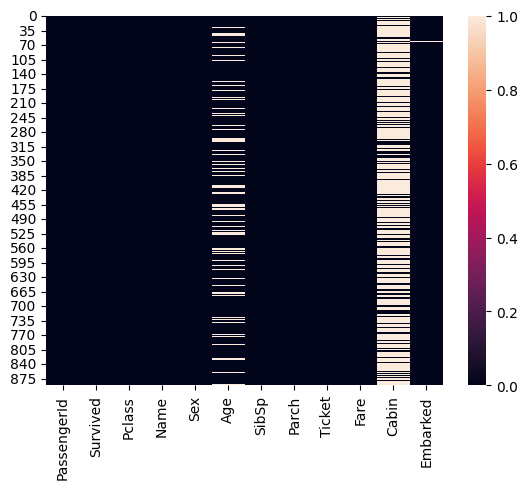

In [14]:
sns.heatmap(titanic_data.isnull())

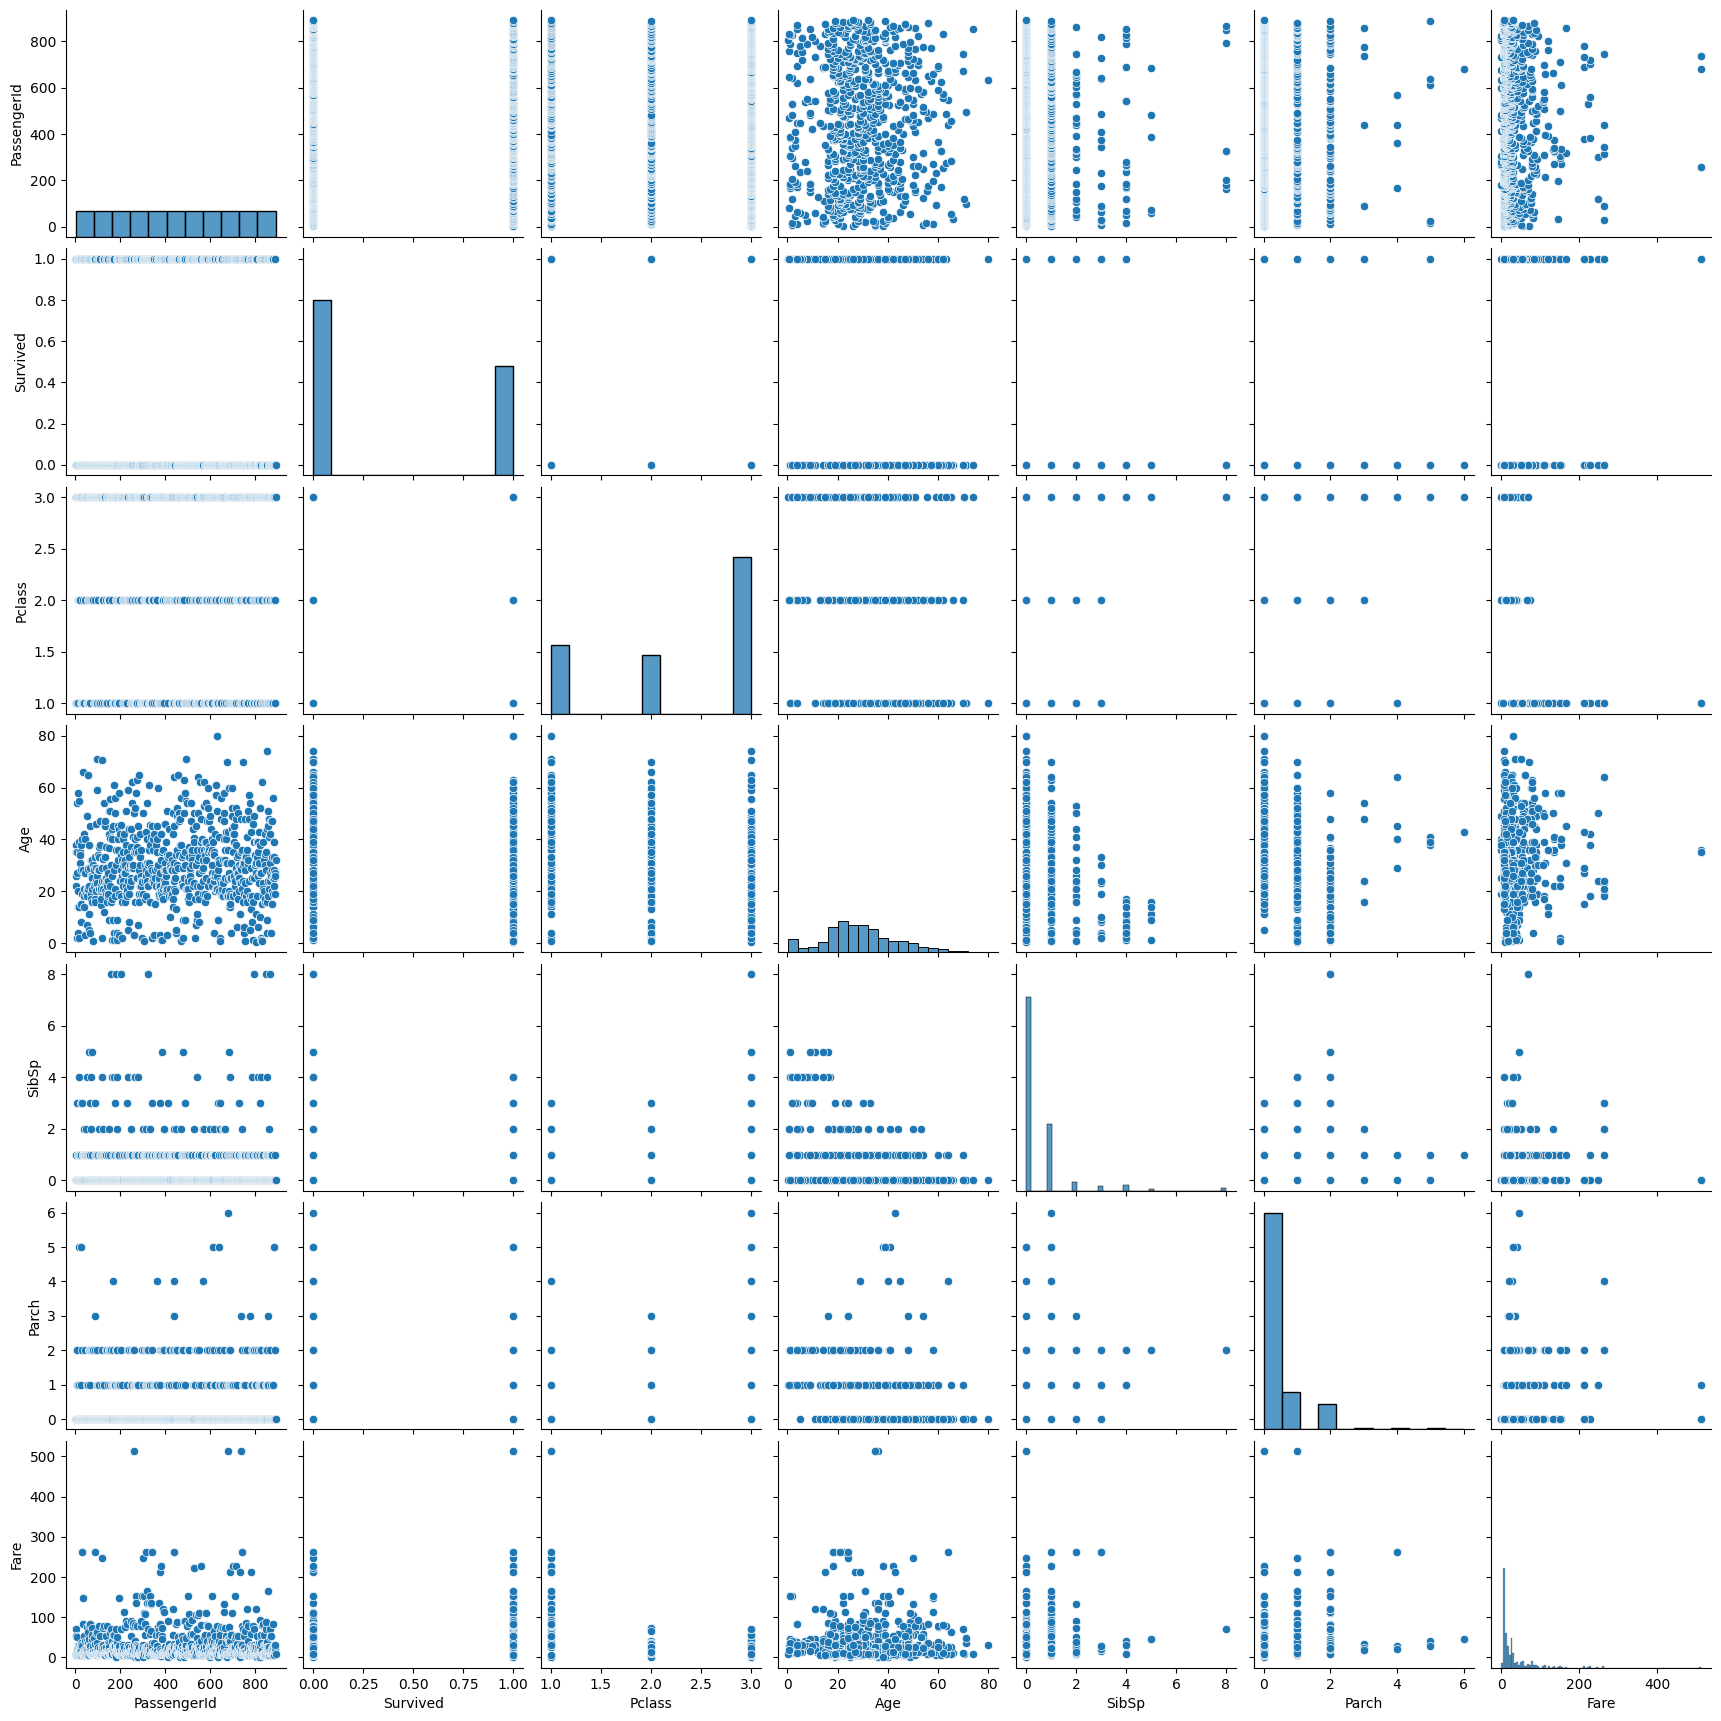

In [15]:
sns.pairplot(data=titanic_data)

<Axes: >

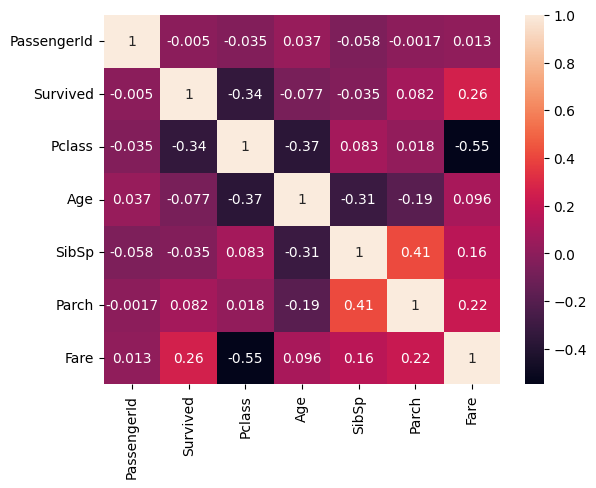

In [16]:
sns.heatmap(data=titanic_data.corr(numeric_only=True),annot=True)

In [17]:
titanic_data.corr(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [18]:
"""
Observation:
 everything -ve ly and +ve ly correlated are considered 
 but not as values close to zero
 because zero menas basically ,it's kind of random,not really correlated
 towards +1:higher this values gets ,higher other value gets
 towards -1:higher this values gets ,lower other value gets
"""

"\nObservation:\n everything -ve ly and +ve ly correlated are considered \n but not as values close to zero\n because zero menas basically ,it's kind of random,not really correlated\n towards +1:higher this values gets ,higher other value gets\n towards -1:higher this values gets ,lower other value gets\n"

<Axes: xlabel='Pclass', ylabel='Age'>

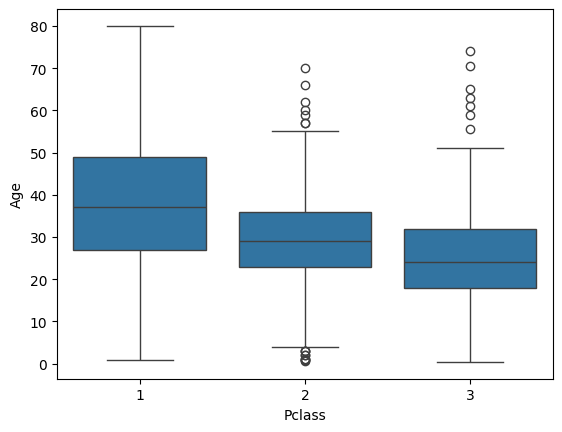

In [19]:
sns.boxplot(data=titanic_data,x='Pclass',y='Age')

In [20]:
titanic_data[titanic_data['Pclass']==1]['Age'].mean()

38.233440860215055

In [21]:
titanic_data[titanic_data['Pclass']==2]['Age'].mean()

29.87763005780347

In [22]:
titanic_data[titanic_data['Pclass']==3]['Age'].mean()

25.14061971830986

<Axes: >

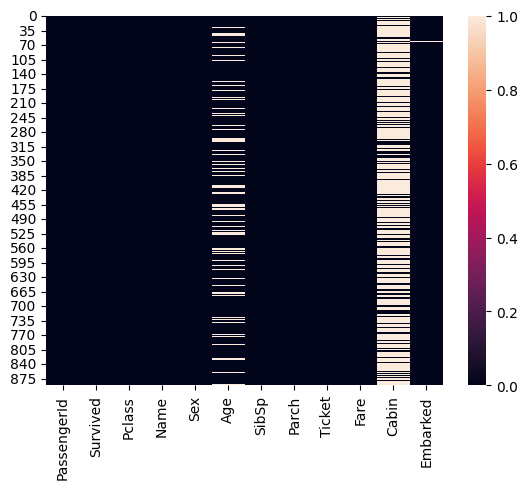

In [23]:
sns.heatmap(titanic_data.isnull())

<Axes: xlabel='Parch', ylabel='Age'>

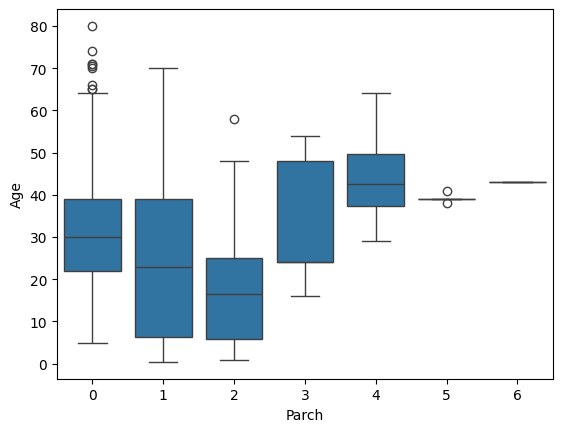

In [24]:
sns.boxplot(data=titanic_data,x='Parch',y='Age')

In [25]:
pclass1_mean_age=int(titanic_data[titanic_data['Pclass']==1]['Age'].mean())
pclass2_mean_age=int(titanic_data[titanic_data['Pclass']==2]['Age'].mean())
pclass3_mean_age=int(titanic_data[titanic_data['Pclass']==3]['Age'].mean())
print(pclass1_mean_age,pclass2_mean_age,pclass3_mean_age)

38 29 25


In [26]:
#filling missing values of age:
def fillage(dfpart):
  if pd.isnull(dfpart[0]):
    if dfpart[1]==1:
      return pclass1_mean_age
    elif dfpart[1]==2:
      return pclass2_mean_age
    elif dfpart[1]==3:
      return pclass3_mean_age
  else:
    return dfpart[0]

<Axes: >

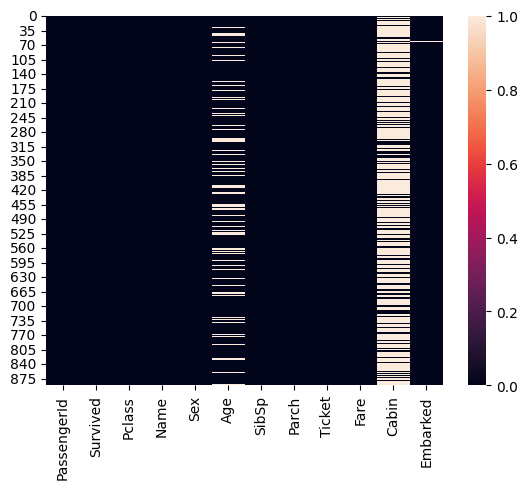

In [27]:
sns.heatmap(titanic_data.isnull())

In [28]:
titanic_data['Age'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [29]:
titanic_data['Age']=titanic_data[['Age','Pclass']].apply(fillage,axis=1)

C:\Users\kannoth\AppData\Local\Temp\ipykernel_3208\1695744335.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if pd.isnull(dfpart[0]):
C:\Users\kannoth\AppData\Local\Temp\ipykernel_3208\1695744335.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dfpart[0]
C:\Users\kannoth\AppData\Local\Temp\ipykernel_3208\1695744335.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if dfpart[1]==1:
C:\Users\kannoth\AppData\Local\Tem

In [30]:
titanic_data['Age'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Age, Length: 891, dtype: bool

<Axes: >

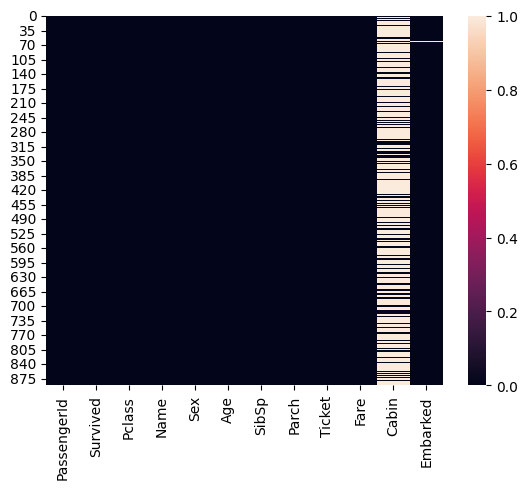

In [31]:
sns.heatmap(titanic_data.isnull())

In [32]:
titanic_data.iloc[888]

PassengerId                                         889
Survived                                              0
Pclass                                                3
Name           Johnston, Miss. Catherine Helen "Carrie"
Sex                                              female
Age                                                25.0
SibSp                                                 1
Parch                                                 2
Ticket                                       W./C. 6607
Fare                                              23.45
Cabin                                               NaN
Embarked                                              S
Name: 888, dtype: object

In [33]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [34]:
titanic_data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [35]:
titanic_data[titanic_data['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


<Axes: xlabel='Pclass', ylabel='count'>

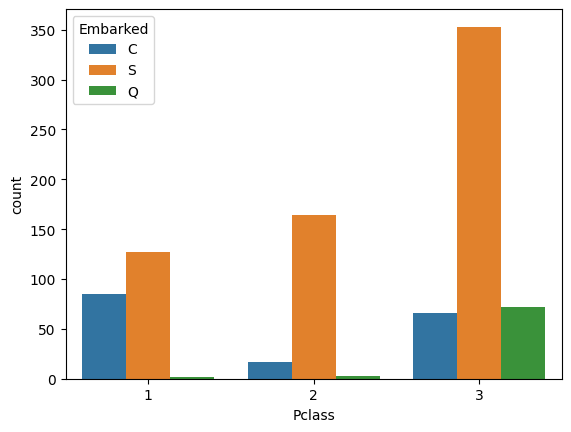

In [36]:
sns.countplot(data=titanic_data,x='Pclass',hue='Embarked')

In [37]:
#filling embarked values
def fillembarked(dfpart):
  if pd.isnull(dfpart[0]):
    return 'S'
  else:
    return dfpart[0]

In [38]:
titanic_data['Embarked']=titanic_data[['Embarked','Pclass']].apply(fillembarked,axis=1)

C:\Users\kannoth\AppData\Local\Temp\ipykernel_3208\229759173.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if pd.isnull(dfpart[0]):
C:\Users\kannoth\AppData\Local\Temp\ipykernel_3208\229759173.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dfpart[0]


In [39]:
titanic_data[titanic_data['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


<Axes: >

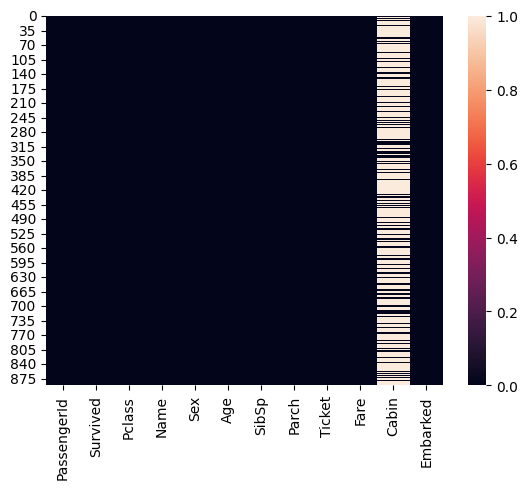

In [40]:
sns.heatmap(titanic_data.isnull())

In [41]:
titanic_data.iloc[61]

PassengerId                     62
Survived                         1
Pclass                           1
Name           Icard, Miss. Amelie
Sex                         female
Age                           38.0
SibSp                            0
Parch                            0
Ticket                      113572
Fare                          80.0
Cabin                          B28
Embarked                         S
Name: 61, dtype: object

In [42]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: >

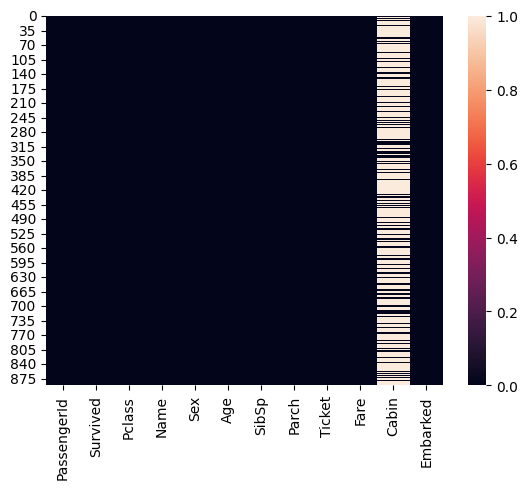

In [43]:
sns.heatmap(titanic_data.isnull())

In [44]:
titanic_data.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

<Axes: >

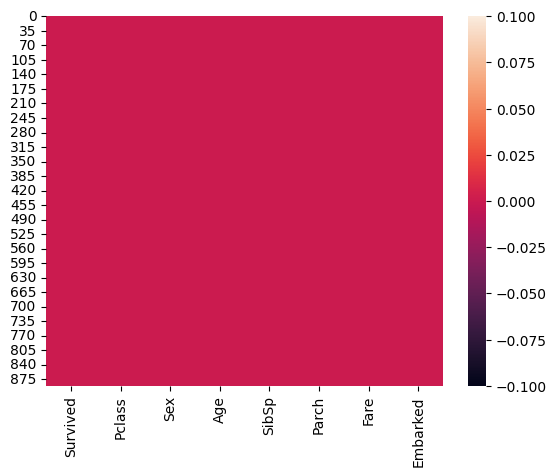

In [45]:
sns.heatmap(titanic_data.isnull())

In [46]:
#creating dummy values sibsp
dummiesSex=pd.get_dummies(titanic_data['Sex'],drop_first=True)
dummiesSex

,male
0,True
1,False
2,False
3,False
4,True
...,...
886,True
887,False
888,False
889,True


In [47]:
#creating dummy values
dummiesSibSp=pd.get_dummies(titanic_data['SibSp'],drop_first=True,prefix='SibSp')
dummiesSibSp

,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8
0,True,False,False,False,False,False
1,True,False,False,False,False,False
2,False,False,False,False,False,False
3,True,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
886,False,False,False,False,False,False
887,False,False,False,False,False,False
888,True,False,False,False,False,False
889,False,False,False,False,False,False


In [48]:
dummiesParch=pd.get_dummies(titanic_data['Parch'],drop_first=True,prefix='Parch')
dummiesParch

,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
886,False,False,False,False,False,False
887,False,False,False,False,False,False
888,False,True,False,False,False,False
889,False,False,False,False,False,False


In [49]:
dummiesEmbarked=pd.get_dummies(titanic_data['Embarked'],drop_first=True)
dummiesEmbarked

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True
...,...,...
886,False,True
887,False,True
888,False,True
889,False,False


In [50]:
titanic_data=pd.concat([titanic_data,dummiesSex,dummiesSibSp,dummiesParch,dummiesEmbarked],axis=1)

<Axes: >

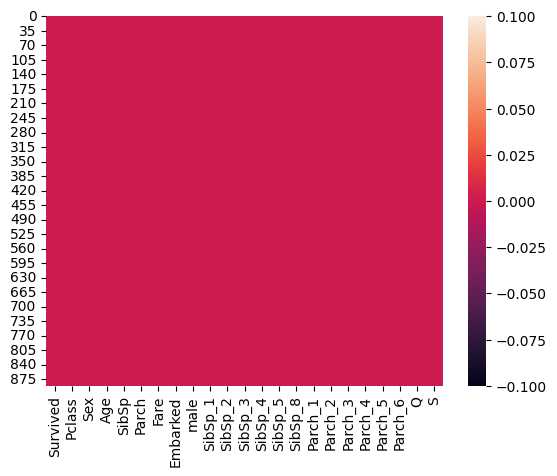

In [51]:
sns.heatmap(titanic_data.isnull())

In [52]:
titanic_data.drop(['Sex','SibSp','Parch','Embarked'],axis=1,inplace=True)

<Axes: >

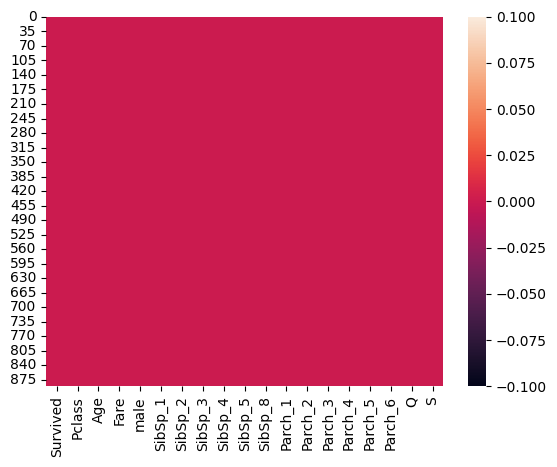

In [53]:
sns.heatmap(titanic_data.isnull())

In [54]:
titanic_data.head()

,Survived,Pclass,Age,Fare,male,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Q,S
0,0,3,22.0,7.2500,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True
1,1,1,38.0,71.2833,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
2,1,3,26.0,7.9250,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,1,1,35.0,53.1000,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True
4,0,3,35.0,8.0500,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [55]:
#training model

In [56]:
from sklearn.model_selection import train_test_split,StratifiedShuffleSplit

In [57]:
sample_X_train1,sample_X_test1,sample_y_train1,sample_y_test1=train_test_split(titanic_data.drop('Survived',axis=1),titanic_data['Survived'],random_state=42,test_size=0.2)

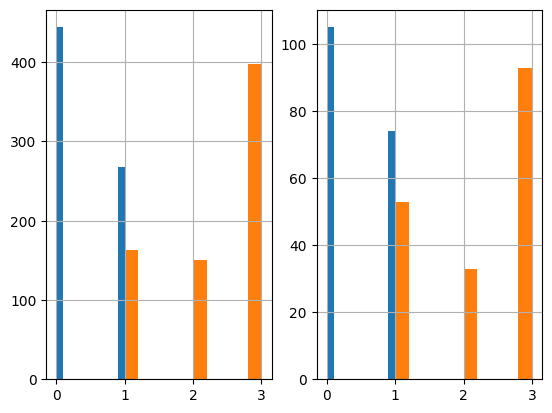

In [58]:
plt.subplot(1,2,1)
sample_y_train1.hist()
sample_X_train1['Pclass'].hist()
#sample_X_train1['male'].hist()
plt.subplot(1,2,2)
sample_y_test1.hist()
sample_X_test1['Pclass'].hist()
#sample_X_test1['male'].hist()

plt.show()

In [59]:
"""sss=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in sss.split(titanic_data.drop('Survived',axis=1),titanic_data['Survived']):
  sample_X_train2,sample_X_test2=titanic_data.drop('Survived',axis=1)[train_index],titanic_data.drop('Survived',axis=1)[test_index]
  sample_y_train2,sample_y_test2=titanic_data['Survived'][train_index],titanic_data['Survived'][test_index]"""

"sss=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)\nfor train_index,test_index in sss.split(titanic_data.drop('Survived',axis=1),titanic_data['Survived']):\n  sample_X_train2,sample_X_test2=titanic_data.drop('Survived',axis=1)[train_index],titanic_data.drop('Survived',axis=1)[test_index]\n  sample_y_train2,sample_y_test2=titanic_data['Survived'][train_index],titanic_data['Survived'][test_index]"

In [60]:
sss=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in sss.split(titanic_data,titanic_data[['Survived','Pclass','male']]):
  sample_train3=titanic_data.loc[train_index]
  sample_test3=titanic_data.loc[test_index]

<Axes: >

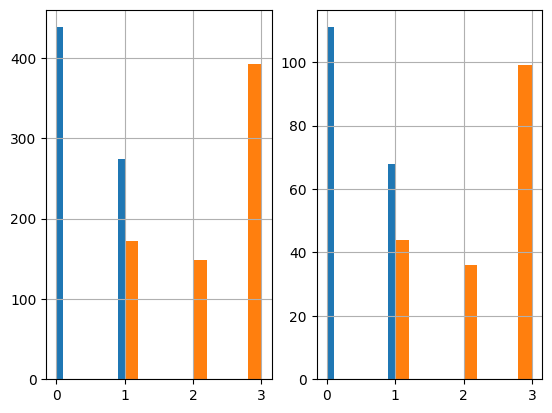

In [61]:
plt.subplot(1,2,1)
sample_train3['Survived'].hist()
sample_train3['Pclass'].hist()
#sample_X_train1['male'].hist()
plt.subplot(1,2,2)
sample_test3['Survived'].hist()
sample_test3['Pclass'].hist()
#sample_X_test1['male'].hist()

In [62]:
sample_X_train4,sample_X_test4,sample_y_train4,sample_y_test4=train_test_split(titanic_data.drop('Survived',axis=1),titanic_data['Survived'],random_state=42,test_size=0.2,stratify=titanic_data['Pclass'])

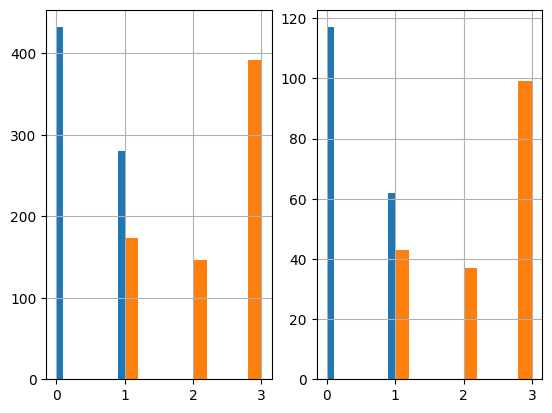

In [63]:
plt.subplot(1,2,1)
sample_y_train4.hist()
sample_X_train4['Pclass'].hist()
#sample_X_train1['male'].hist()
plt.subplot(1,2,2)
sample_y_test4.hist()
sample_X_test4['Pclass'].hist()
#sample_X_test1['male'].hist()

plt.show()

In [64]:
sample_train3

,Survived,Pclass,Age,Fare,male,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Q,S
867,0,1,31.0,50.4958,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True
619,0,2,26.0,10.5000,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True
50,0,3,7.0,39.6875,True,False,False,False,True,False,False,True,False,False,False,False,False,False,True
286,1,3,30.0,9.5000,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True
834,0,3,18.0,8.3000,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,0,3,50.0,8.0500,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True
518,1,2,36.0,26.0000,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True
54,0,1,65.0,61.9792,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False
603,0,3,44.0,8.0500,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [65]:
sample_test3

,Survived,Pclass,Age,Fare,male,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Q,S
659,0,1,58.00,113.2750,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False
119,0,3,2.00,31.2750,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True
875,1,3,15.00,7.2250,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
67,0,3,19.00,8.1583,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True
644,1,3,0.75,19.2583,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,1,3,33.00,15.8500,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True
687,0,3,19.00,10.1708,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True
538,0,3,25.00,14.5000,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True
279,1,3,35.00,20.2500,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True



"""
for train_indices,test_indices in split.split(titanic_data,titanic_data[['Survived','Pclass','Sex']]):
  strat_train_set=titanic_data.loc[train_indices]
  strat_test_set=titanic_data.loc[test_indices]

plt.subplot(1,2,1)
strat_train_set['Survived'].hist()
strat_train_set['Pclass'].hist()
plt.subplot(1,2,2)
strat_test_set['Survived'].hist()
strat_test_set['Pclass'].hist()

plt.show()
"""

In [66]:
sample_X_test4

,Pclass,Age,Fare,male,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Q,S
132,3,47.0,14.5000,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True
3,1,35.0,53.1000,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True
270,1,38.0,31.0000,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True
421,3,21.0,7.7333,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False
154,3,25.0,7.3125,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839,1,38.0,29.7000,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
766,1,38.0,39.6000,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
685,2,25.0,41.5792,True,True,False,False,False,False,False,False,True,False,False,False,False,False,False
476,2,34.0,21.0000,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True


In [67]:
sample_X_train4

,Pclass,Age,Fare,male,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Q,S
820,1,52.0,93.5000,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True
439,2,31.0,10.5000,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True
821,3,27.0,8.6625,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True
403,3,28.0,15.8500,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True
343,2,25.0,13.0000,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13,3,39.0,31.2750,True,True,False,False,False,False,False,False,False,False,False,True,False,False,True
789,1,46.0,79.2000,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
51,3,21.0,7.8000,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True
625,1,61.0,32.3208,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [68]:
sample_y_test4

132    0
3      1
270    0
421    0
154    0
      ..
839    1
766    0
685    0
476    0
203    0
Name: Survived, Length: 179, dtype: int64

In [69]:
sample_y_train4

820    1
439    0
821    1
403    0
343    0
      ..
13     0
789    0
51     0
625    0
144    0
Name: Survived, Length: 712, dtype: int64

In [70]:
"""
sample_X_train4,sample_X_test4,sample_y_train4,sample_y_test4=train_test_split(titanic_data.drop('Survived',axis=1),titanic_data['Survived'],random_state=42,test_size=0.2,stratify=titanic_data['Pclass'])

sss=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in sss.split(titanic_data,titanic_data[['Survived','Pclass']]):
  sample_train3=titanic_data.loc[train_index]
  sample_test3=titanic_data.loc[test_index]
"""

"\nsample_X_train4,sample_X_test4,sample_y_train4,sample_y_test4=train_test_split(titanic_data.drop('Survived',axis=1),titanic_data['Survived'],random_state=42,test_size=0.2,stratify=titanic_data['Pclass'])\n\nsss=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)\nfor train_index,test_index in sss.split(titanic_data,titanic_data[['Survived','Pclass']]):\n  sample_train3=titanic_data.loc[train_index]\n  sample_test3=titanic_data.loc[test_index]\n"

METHOD1

In [95]:
X_train,X_test,y_train,y_test=train_test_split(titanic_data.drop('Survived',axis=1),
titanic_data['Survived'],test_size=0.2,random_state=42,stratify=titanic_data[['Survived','Pclass','male']].apply(tuple,axis=1))

In [96]:
#scaling
from sklearn.preprocessing import StandardScaler

In [99]:
scaler=StandardScaler()

In [100]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [101]:
y_train=y_train.to_numpy()
#y_test=y_train.to_numpy(y_test)

In [102]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [103]:
X_train.shape

(712, 18)

In [104]:
seqmodel1=Sequential()

seqmodel1.add(Dense(18,activation='relu'))
seqmodel1.add(Dropout(0.5))

seqmodel1.add(Dense(9,activation='relu'))
seqmodel1.add(Dropout(0.5))

seqmodel1.add(Dense(1,activation='sigmoid'))

seqmodel1.compile(loss='binary_crossentropy',optimizer='adam')

In [105]:
seqmodel1.fit(x=X_train,y=y_train,validation_data=(X_test,y_test.to_numpy()),epochs=600)

Epoch 1/600
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.7618 - val_loss: 0.6911
Epoch 2/600
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7326 - val_loss: 0.6607
Epoch 3/600
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7125 - val_loss: 0.6404
Epoch 4/600
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7322 - val_loss: 0.6253
Epoch 5/600
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6750 - val_loss: 0.6111
Epoch 6/600
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6499 - val_loss: 0.5981
Epoch 7/600
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6506 - val_loss: 0.5872
Epoch 8/600
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6841 - val_loss: 0.5777
Epoch 9/600
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6427 - val_loss: 0.5721
Epoch 10/600
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6098 - val_loss: 0.5637
Epoch 11/600
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6405 - val_loss: 0.5565
Epoch 12/600
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6

<Axes: >

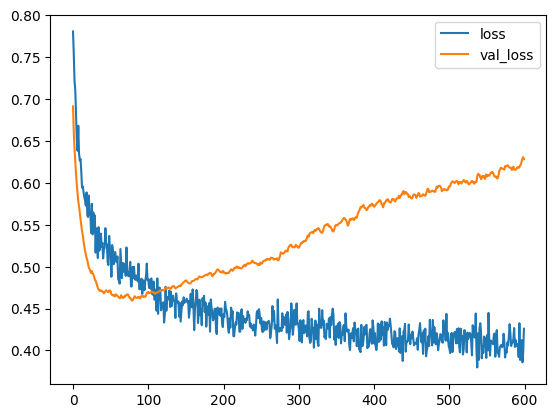

In [106]:
losses_model1=pd.DataFrame(seqmodel1.history.history)
losses_model1.plot()

In [107]:
#from tensorflow.keras.callbacks import EarlyStopping
#early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [108]:
#model1.fit(x=X_train,y=y_train,validation_data=(X_test,y_test.to_numpy()),epochs=600,callbacks=[early_stop])
#losses_model1=pd.DataFrame(model1.history.history)
#losses_model1.plot()

In [ ]:
#here validation loss is increasing with adding earlystopping
"""
model tuning or hyperparameter optimization


"""

In [109]:
predictions1=(seqmodel1.predict(X_test) > 0.5)*1

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step  


In [110]:
predictions1

array([[0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [111]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(predictions1,y_test))
print(confusion_matrix(predictions1,y_test))

              precision    recall  f1-score   support

           0       0.85      0.79      0.82       119
           1       0.63      0.72      0.67        60

    accuracy                           0.77       179
   macro avg       0.74      0.75      0.74       179
weighted avg       0.77      0.77      0.77       179

[[94 25]
 [17 43]]


In [118]:
titanic_train_data=pd.read_csv('data/train.csv')

In [128]:

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

class AgeImputer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        self.pclass1_mean_age = int(X[X['Pclass'] == 1]['Age'].mean())
        self.pclass2_mean_age = int(X[X['Pclass'] == 2]['Age'].mean())
        self.pclass3_mean_age = int(X[X['Pclass'] == 3]['Age'].mean())
        return self

    def transform(self, X):
        X = X.copy()
        X['Age'] = X.apply(lambda row: self.pclass1_mean_age if pd.isnull(row['Age']) and row['Pclass'] == 1
                                       else self.pclass2_mean_age if pd.isnull(row['Age']) and row['Pclass'] == 2
                                       else self.pclass3_mean_age if pd.isnull(row['Age']) and row['Pclass'] == 3
                                       else row['Age'], axis=1)
        return X

class EmbarkedImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        X = X.copy()
        X['Embarked'] = X['Embarked'].fillna('S')
        return X

class DropColumns(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def transform(self, X):
        return X.drop(columns=self.columns)

    def fit(self, X, y=None):
        return self

class CreateDummies(BaseEstimator, TransformerMixin):
    def transform(self, X):
        dummiesSex = pd.get_dummies(X['Sex'], drop_first=True)
        dummiesSibSp = pd.get_dummies(X['SibSp'], drop_first=True, prefix='SibSp')
        dummiesParch = pd.get_dummies(X['Parch'], drop_first=True, prefix='Parch')
        dummiesEmbarked = pd.get_dummies(X['Embarked'], drop_first=True)
        X = pd.concat([X, dummiesSex, dummiesSibSp, dummiesParch, dummiesEmbarked], axis=1)
        return X

    def fit(self, X, y=None):
        return self

# Define the pipeline
pipeline = Pipeline(steps=[
    ('age_imputer', AgeImputer()),
    ('embarked_imputer', EmbarkedImputer()),
    ('drop_columns', DropColumns(['PassengerId', 'Name', 'Ticket', 'Cabin'])),
    ('create_dummies', CreateDummies()),
    ('drop_final_columns', DropColumns(['Sex', 'SibSp', 'Parch', 'Embarked']))
])

# Apply the pipeline to the training data


# Apply the same pipeline to the test data
# Make sure to fit only on the training data to avoid data leakage
#titanic_test_cleaned = pipeline.transform(titanic_test_data)


In [140]:
titanic_train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [129]:
final_titanic_train_data= pipeline.fit_transform(titanic_train_data)

In [134]:
y_final_titanic_train_data=final_titanic_train_data['Survived']
y_final_titanic_train_data=y_final_titanic_train_data.to_numpy()
X_final_titanic_train_data=final_titanic_train_data.drop('Survived',axis=1)
scaler=StandardScaler()
X_final_titanic_train_data=scaler.fit_transform(X_final_titanic_train_data)


In [135]:
y_final_titanic_train_data

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [136]:
X_final_titanic_train_data

array([[ 0.82737724, -0.54925917, -0.50244517, ..., -0.03352008,
        -0.30756234,  0.61583843],
       [-1.56610693,  0.66244506,  0.78684529, ..., -0.03352008,
        -0.30756234, -1.62380254],
       [ 0.82737724, -0.24633311, -0.48885426, ..., -0.03352008,
        -0.30756234,  0.61583843],
       ...,
       [ 0.82737724, -0.32206462, -0.17626324, ..., -0.03352008,
        -0.30756234,  0.61583843],
       [-1.56610693, -0.24633311, -0.04438104, ..., -0.03352008,
        -0.30756234, -1.62380254],
       [ 0.82737724,  0.20805597, -0.49237783, ..., -0.03352008,
         3.25137334, -1.62380254]])

In [133]:
final_seqmodel1=Sequential()

final_seqmodel1.add(Dense(18,activation='relu'))
final_seqmodel1.add(Dropout(0.5))

final_seqmodel1.add(Dense(9,activation='relu'))
final_seqmodel1.add(Dropout(0.5))

final_seqmodel1.add(Dense(1,activation='sigmoid'))

final_seqmodel1.compile(loss='binary_crossentropy',optimizer='adam')

In [137]:
final_seqmodel1.fit(x=X_final_titanic_train_data,y=y_final_titanic_train_data,epochs=600,)

Epoch 1/600
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.8296
Epoch 2/600
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 922us/step - loss: 0.7475
Epoch 3/600
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7271 
Epoch 4/600
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7084 
Epoch 5/600
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6691 
Epoch 6/600
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6336 
Epoch 7/600
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6443 
Epoch 8/600
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6697
Epoch 9/600
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6365 
Epoch 10/600
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6209 
Epoch 11/600
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6209
Epoch 12/600
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5986  
Epoch 13/600
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6095 
Epoch 14/600
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6174 
Epoch 15/600
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss

In [138]:
titanic_test_data=pd.read_csv('data/test.csv')

In [141]:
final_titanic_test_data=pipeline.fit_transform(titanic_test_data)

In [142]:
final_titanic_test_data

,Pclass,Age,Fare,male,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Parch_9,Q,S
0,3,34.5,7.8292,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,3,47.0,7.0000,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,2,62.0,9.6875,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
3,3,27.0,8.6625,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,3,22.0,12.2875,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,24.0,8.0500,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
414,1,39.0,108.9000,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
415,3,38.5,7.2500,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
416,3,24.0,8.0500,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [145]:
final_titanic_test_data.drop('Parch_9',axis=1,inplace=True)

In [ ]:
sns.heatmap(final_titanic_test_data.isnull())

In [ ]:
final_titanic_test_data['Fare'].fillna(final_titanic_test_data['Fare'].mean(),inplace=True)

In [ ]:
sns.heatmap(final_titanic_test_data.isnull())

In [148]:
scaled_final_titanic_test_data=scaler.transform(final_titanic_test_data)

In [149]:
scaled_final_titanic_test_data

array([[ 0.82737724,  0.39738476, -0.49078316, ..., -0.03352008,
         3.25137334, -1.62380254],
       [ 0.82737724,  1.34402868, -0.50747884, ..., -0.03352008,
        -0.30756234,  0.61583843],
       [-0.36936484,  2.48000139, -0.45336687, ..., -0.03352008,
         3.25137334, -1.62380254],
       ...,
       [ 0.82737724,  0.70031081, -0.50244517, ..., -0.03352008,
        -0.30756234,  0.61583843],
       [ 0.82737724, -0.39779614, -0.48633742, ..., -0.03352008,
        -0.30756234,  0.61583843],
       [ 0.82737724, -0.39779614, -0.19824428, ..., -0.03352008,
        -0.30756234, -1.62380254]])

In [150]:
predictions_final_seqmodel1=(final_seqmodel1.predict(scaled_final_titanic_test_data) > 0.5)*1

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [151]:
predictions_final_seqmodel1

array([[0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
    

In [152]:
titanic_test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [160]:
df_predictions_final_seqmodel1=pd.DataFrame(titanic_test_data['PassengerId'])

In [161]:
df_predictions_final_seqmodel1

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [162]:
df_predictions_final_seqmodel1['Survived']=predictions_final_seqmodel1

In [163]:
df_predictions_final_seqmodel1

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [164]:

df_predictions_final_seqmodel1.to_csv('csv_df_predictions_final_seqmodel1.csv',index=False)

In [168]:
"""

titanic_data=first data collected for all training ,featuing and cleaning etc
X_train->for training initial sample model
X_test->for testing initial sample model
y_train->for training initial sample model(labels)
y_test->for testing initial sample model(labels)

titanic_train_data=train data selected for training without spliting(whole data is used for training)
final_titanic_train_data=titanic_train_data after data cleaning
X_final_titanic_train_data=final_titanic_train_data (features)(scaled)
y_final_titanic_train_data=final_titanic_train_data (labels)(converted to numpy)

titanic_test_data=train data selected for training without spliting(whole data is used for testing)
final_titanic_test_data=titanic_test_data after data cleaning
scaled_final_titanic_test_data=final_titanic_test_data after scaling

"""


'\n\ntitanic_data=first data collected for all training ,featuing and cleaning etc\nX_train->for training initial sample model\nX_test->for testing initial sample model\ny_train->for training initial sample model(labels)\ny_test->for testing initial sample model(labels)\n\ntitanic_train_data=train data selected for training without spliting(whole data is used for training)\nfinal_titanic_train_data=titanic_train_data after data cleaning\nX_final_titanic_train_data=final_titanic_train_data (features)(scaled)\ny_final_titanic_train_data=final_titanic_train_data (labels)(converted to numpy)\n\ntitanic_test_data=train data selected for training without spliting(whole data is used for testing)\nfinal_titanic_test_data=titanic_test_data after data cleaning\n\n'

METHOD2 logisticregression

In [165]:
from sklearn.linear_model import LogisticRegression

In [166]:
log_model1=LogisticRegression()

In [169]:
X_train

array([[-1.56828591,  0.13020014,  0.42599285, ..., -0.03750293,
        -0.31963602,  0.60764362],
       [-0.37019624, -0.25038011, -0.45515341, ..., -0.03750293,
        -0.31963602,  0.60764362],
       [ 0.82789342, -1.69658508,  0.18787552, ..., -0.03750293,
        -0.31963602,  0.60764362],
       ...,
       [-1.56828591,  2.71814587,  0.67898329, ..., -0.03750293,
        -0.31963602, -1.64570147],
       [ 0.82789342,  1.1197088 , -0.50912929, ..., -0.03750293,
        -0.31963602,  0.60764362],
       [-1.56828591, -1.39212088,  1.95723778, ..., -0.03750293,
        -0.31963602,  0.60764362]])

In [170]:
log_model1.fit(X_train,y_train)

LogisticRegression()

In [171]:
predictions_log_model1=log_model1.predict(X_test)

In [172]:
predictions_log_model1

array([0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0], dtype=int64)

In [175]:
print(confusion_matrix(predictions_log_model1,y_test))
print(classification_report(predictions_log_model1,y_test))

[[96 21]
 [15 47]]
              precision    recall  f1-score   support

           0       0.86      0.82      0.84       117
           1       0.69      0.76      0.72        62

    accuracy                           0.80       179
   macro avg       0.78      0.79      0.78       179
weighted avg       0.80      0.80      0.80       179



In [176]:
final_log_model1=LogisticRegression()

In [179]:
final_log_model1.fit(X_final_titanic_train_data,y_final_titanic_train_data)

LogisticRegression()

In [215]:
predictions_final_log_model1=final_log_model1.predict(scaled_final_titanic_test_data)

In [216]:
predictions_final_log_model1

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [218]:
titanic_test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [219]:
df_predictions_final_logmodel1=pd.DataFrame(titanic_test_data['PassengerId'])

In [221]:
df_predictions_final_logmodel1['Survived']=predictions_final_log_model1

In [222]:
df_predictions_final_logmodel1

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [224]:
df_predictions_final_logmodel1.to_csv('csv_df_predictions_final_logmodel1.csv',index=False)

METHOD3
#using kclassifier

In [ ]:
from sklearn.model_selection import KFold,cross_val_score
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [91]:
model2=Sequential()

model2.add(Dense(18,activation='relu'))
model2.add(Dropout(0.5))

model2.add(Dense(9,activation='relu'))
model2.add(Dropout(0.5))

model2.add(Dense(1,activation='sigmoid'))

model2.compile(loss='binary_crossentropy',optimizer='adam')

In [92]:
del(model2)

In [266]:
print("X_train shape:", X_train.shape)  # Should be (num_samples, num_features)
print("y_train shape:", y_train.shape)  # Should match the output of your model
print("X_test shape:", X_test.shape)    # Same as X_train shape
print("y_test shape:", y_test.shape)

X_train shape: (712, 18)
y_train shape: (712,)
X_test shape: (179, 18)
y_test shape: (179,)


METHOD4

In [ ]:
sss=StratifiedShuffleSplit(n_splits=1,random_state=42,test_size=0.2)
for train_indices,test_indices in sss.split(titanic_data,titanic_data[['Survived','Pclass','male']]):
  train_data=titanic_data.iloc[train_indices]
  test_data=titanic_data.iloc[test_indices]